Student perfomance Indicater


## Life cycle of ml projects

1.Understanding the problem statement
2.Data collection
3.Data checks to perform
4.Exploratory data analysis
5.Data pre-processing
6.Model Training
7.Choose best Model


## Problem statement

This project is to understand how the student's performance (test score) is affected by other variables such as Gender,Ethnicity,parental level of education,lunch and test preparation course.


## Data Collection 
Data source - kaggle dataset
The data contain 8 columns and 1000 rows





Import the data and required packages 


In [1]:
#importing libraries

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
#missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no duplicate values

In [6]:
#duplicated values 
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#no of unique values of each columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


1.From above description of numerical data where all mean between 66 and 68.05

2.all std are between 14 and 15

3.min score for math is 0 ,writing is 10 and reading has 17

In [10]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [11]:
#categories unique values
print("categories in 'gender' variable:",df['gender'].unique())
print("categories in 'race/ethnicity' variable:",df['race/ethnicity'].unique())
print("categories in 'parental level of education' variable:",df['parental level of education'].unique())
print("categories in 'lunch' variable:",df['lunch'].unique())
print("categories in 'test preparation course' variable:",df['test preparation course'].unique())

categories in 'gender' variable: ['female' 'male']
categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable: ['standard' 'free/reduced']
categories in 'test preparation course' variable: ['none' 'completed']


In [12]:
num_col=[feature for feature in df.columns if df[feature].dtype != 'O']
cat_col=[feature for feature in df.columns if df[feature].dtype == 'O']

In [13]:
print(f'We have {len(num_col)} numurical features {num_col}')
print(f'We have {len(cat_col)} numurical features {cat_col}')

We have 3 numurical features ['math score', 'reading score', 'writing score']
We have 5 numurical features ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [14]:
#adding the total score
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average']=(df['total score']/3).round(2)

In [15]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33


In [16]:
#student with full mark
reading_full=df[df['reading score'] == 100]['average'].count()
writing_full=df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print('no of stud with full mark in reading',reading_full)
print('no of stud with full marks in writing',writing_full)
print('no of stud with full marks with math',math_full)

no of stud with full mark in reading 17
no of stud with full marks in writing 14
no of stud with full marks with math 7


In [17]:
#student with less than 20 marks 
reading_full=df[df['reading score'] <=20]['average'].count()
writing_full=df[df['writing score'] <= 20]['average'].count()
math_full = df[df['math score'] <= 20]['average'].count()

print('no of stud with less mark in reading',reading_full)
print('no of stud with less marks in writing',writing_full)
print('no of stud with less marks with math',math_full)

no of stud with less mark in reading 1
no of stud with less marks in writing 3
no of stud with less marks with math 4


Students perform low in math and high in reading

In [18]:
#visualization of the studend performance


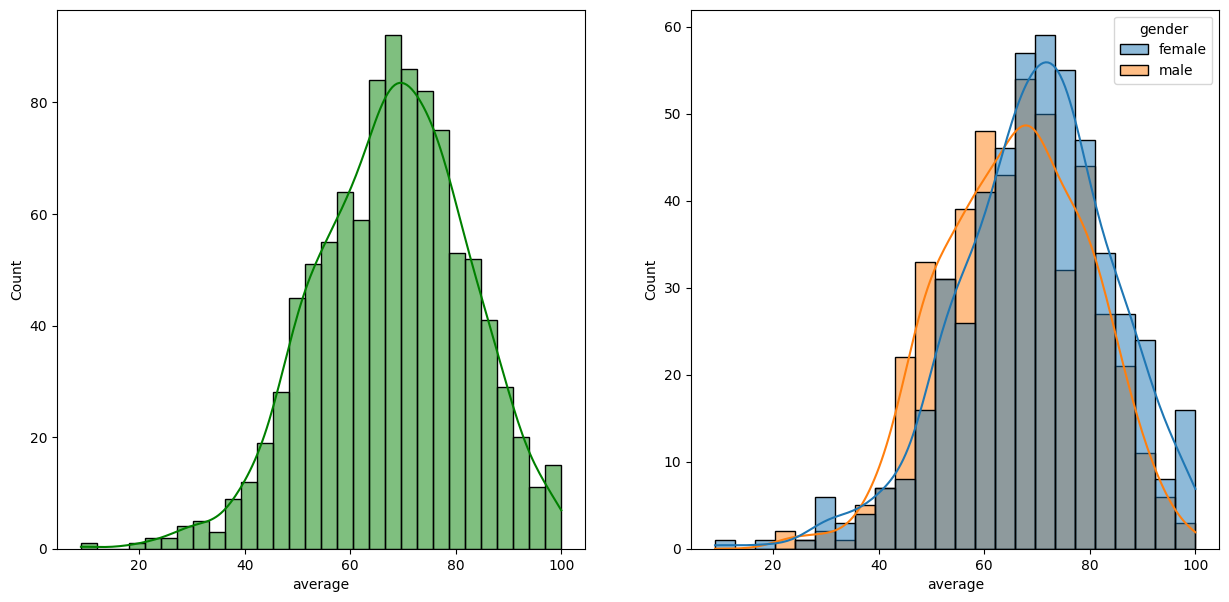

In [19]:
fig,axs=plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

Female students tend to perform well then male students

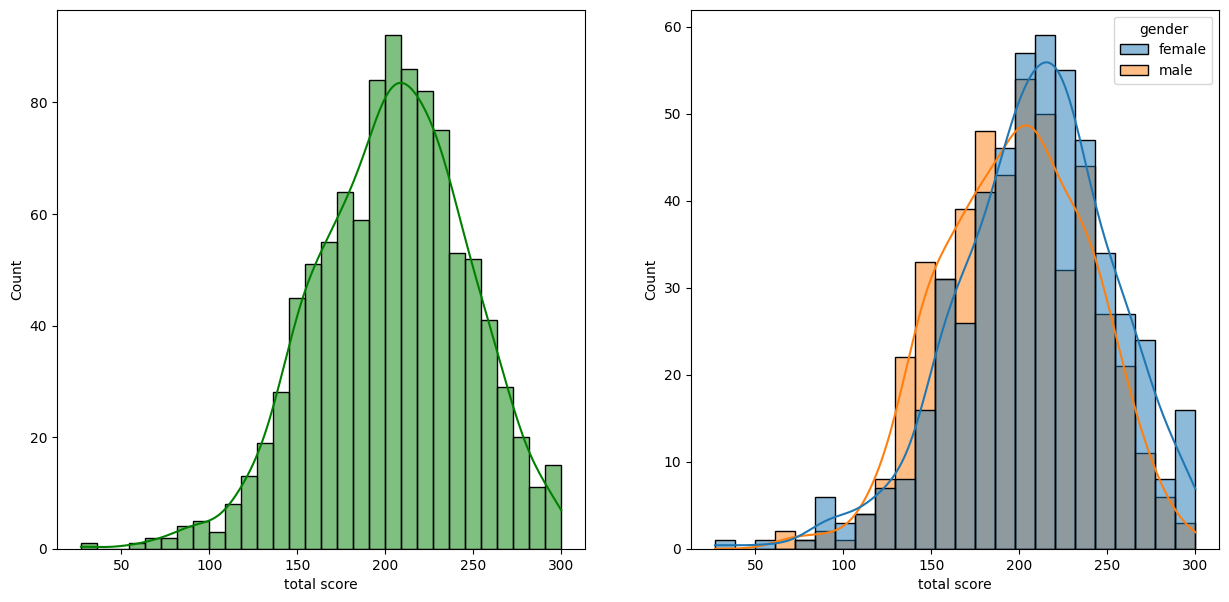

In [20]:
fig,axs=plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

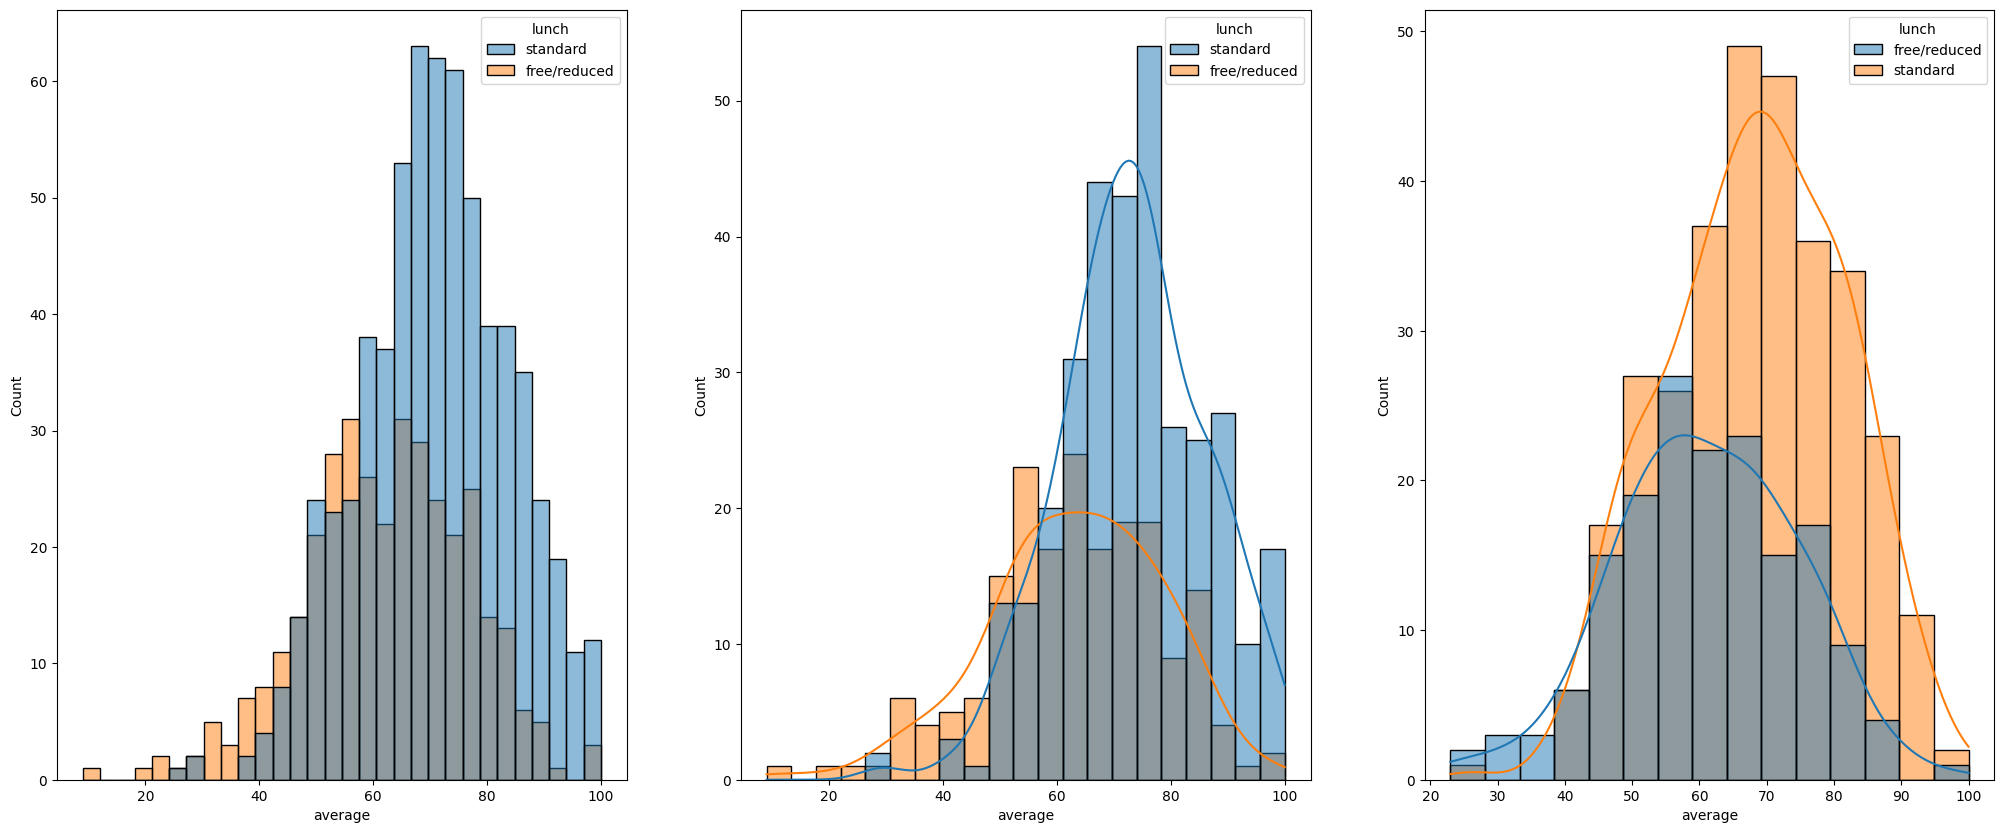

In [21]:
fig,axes=plt.subplots(1,3, figsize=(25,10))
plt.subplot(131)
sns.histplot(data=df,x='average',bins=30,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='lunch')
plt.show()

standard lunch helps perform well in exam both male or female

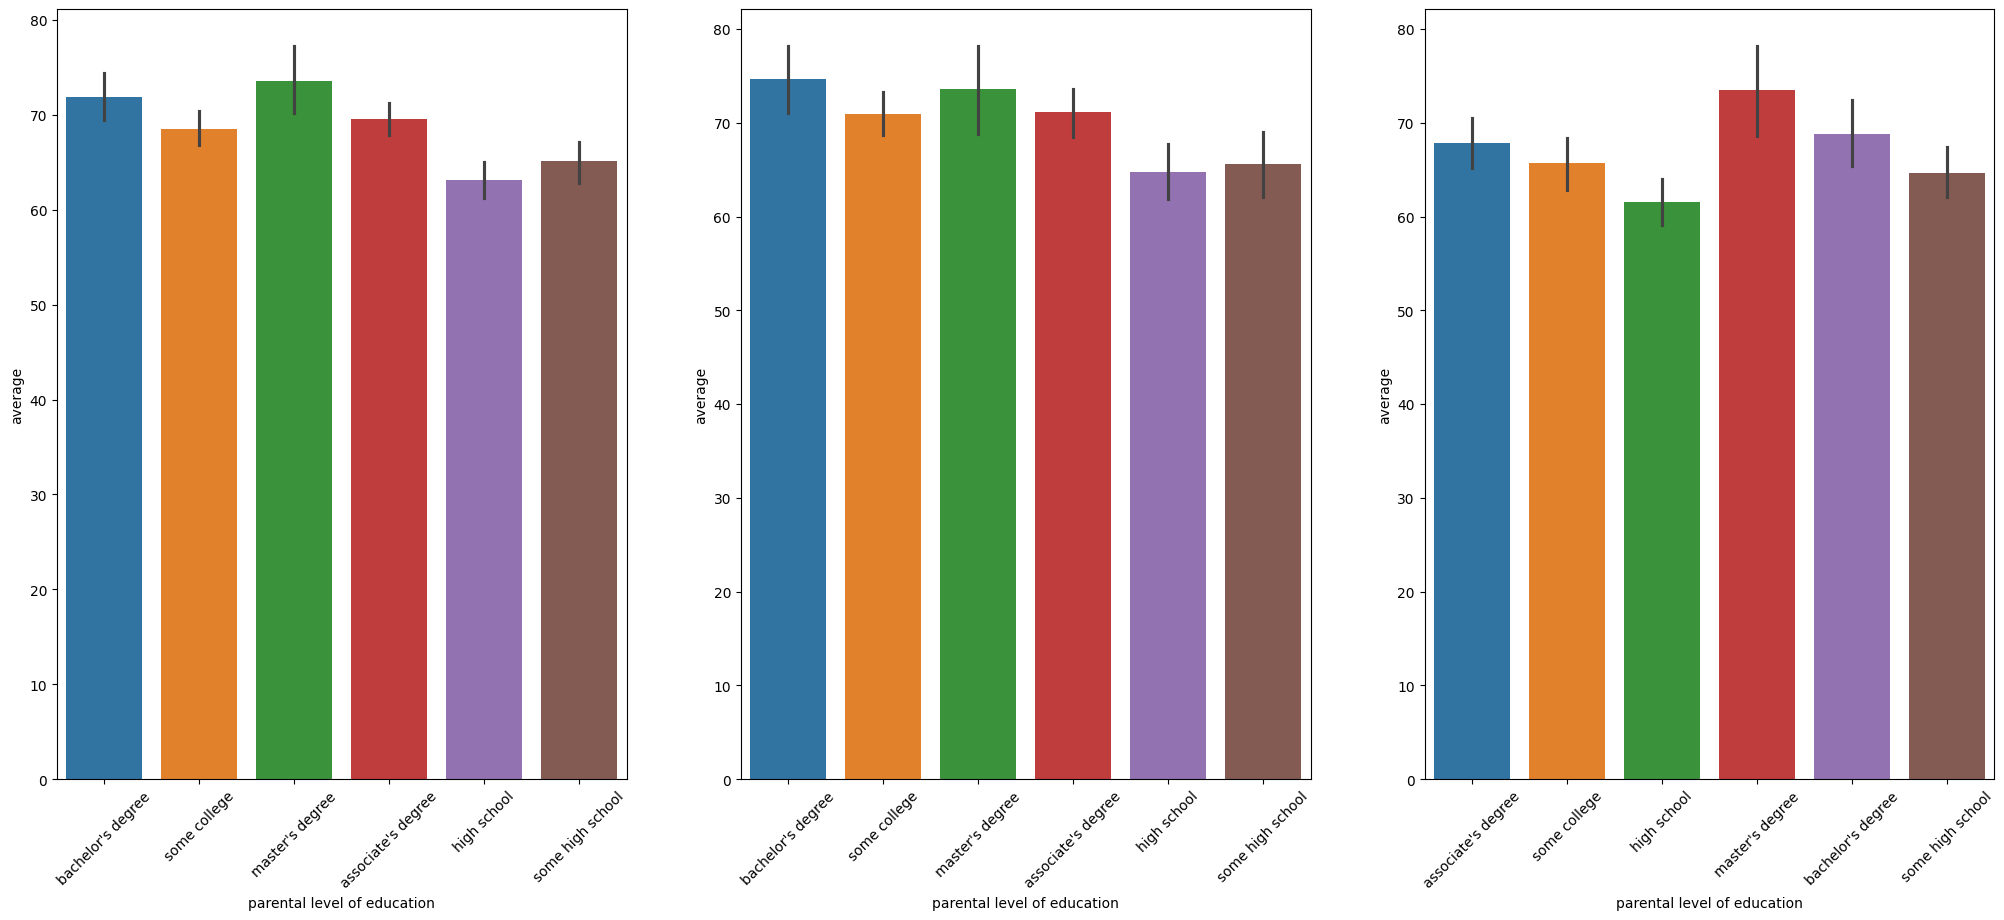

In [22]:
fig,axes=plt.subplots(1,3, figsize=(25,10))
plt.subplot(131)
sns.barplot(data=df,x='parental level of education',y='average',hue='parental level of education')
plt.xticks(rotation=45)
plt.subplot(132)
sns.barplot(data=df[df['gender']=='female'],x='parental level of education',y='average',hue='parental level of education')
plt.xticks(rotation=45)
plt.subplot(133)
sns.barplot(data=df[df['gender']=='male'],x='parental level of education',y='average',hue='parental level of education')
plt.xticks(rotation=45)
plt.show()

student education level not play major role 
for both male and female the highest eduction is master's degree or bachelor's degree

In [23]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score', 'average'],
      dtype='object')

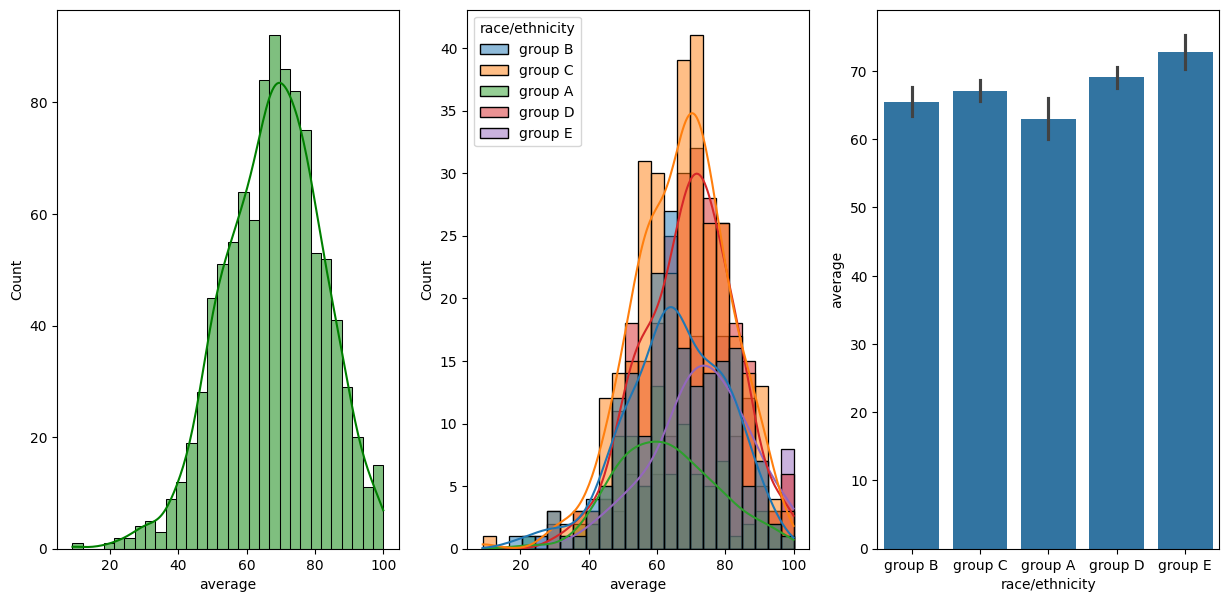

In [24]:
fig,axs=plt.subplots(1,3, figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(132)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(133)
sns.barplot(data=df,x='race/ethnicity',y='average')
plt.show()

Group A and Group B perform poorly compare to other groups

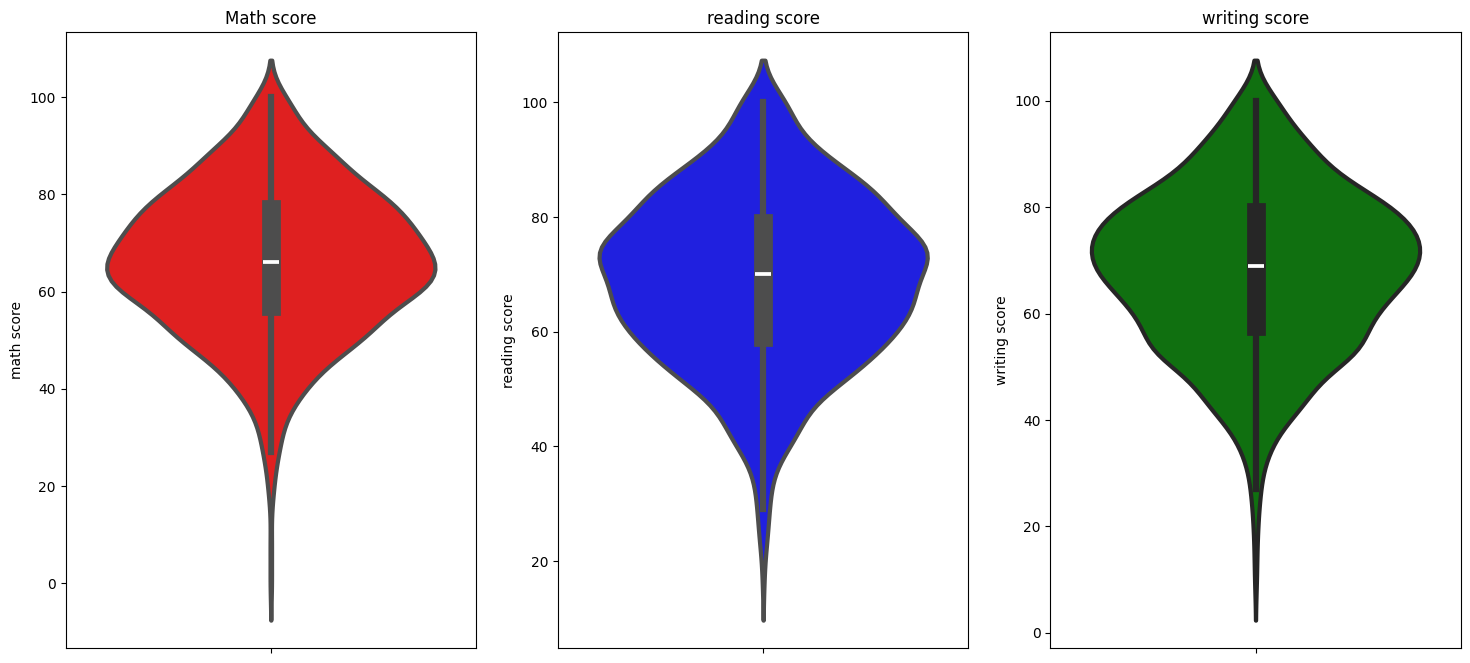

In [25]:
#maximum score of stundents in all three subjects

plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
plt.title('Math score')
sns.violinplot(data=df,y='math score',color='red',linewidth=3)
plt.subplot(1,3,2)
plt.title('reading score')
sns.violinplot(data=df,y='reading score',color='blue',linewidth=3)
plt.subplot(1,3,3)
plt.title('writing score')
sns.violinplot(data=df,y='writing score',color='green',linewidth=3)
plt.show()

most of the stud score b/w 60-80 in math and 50-80 in both reading and writing

In [26]:
#Multivariate analysis

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

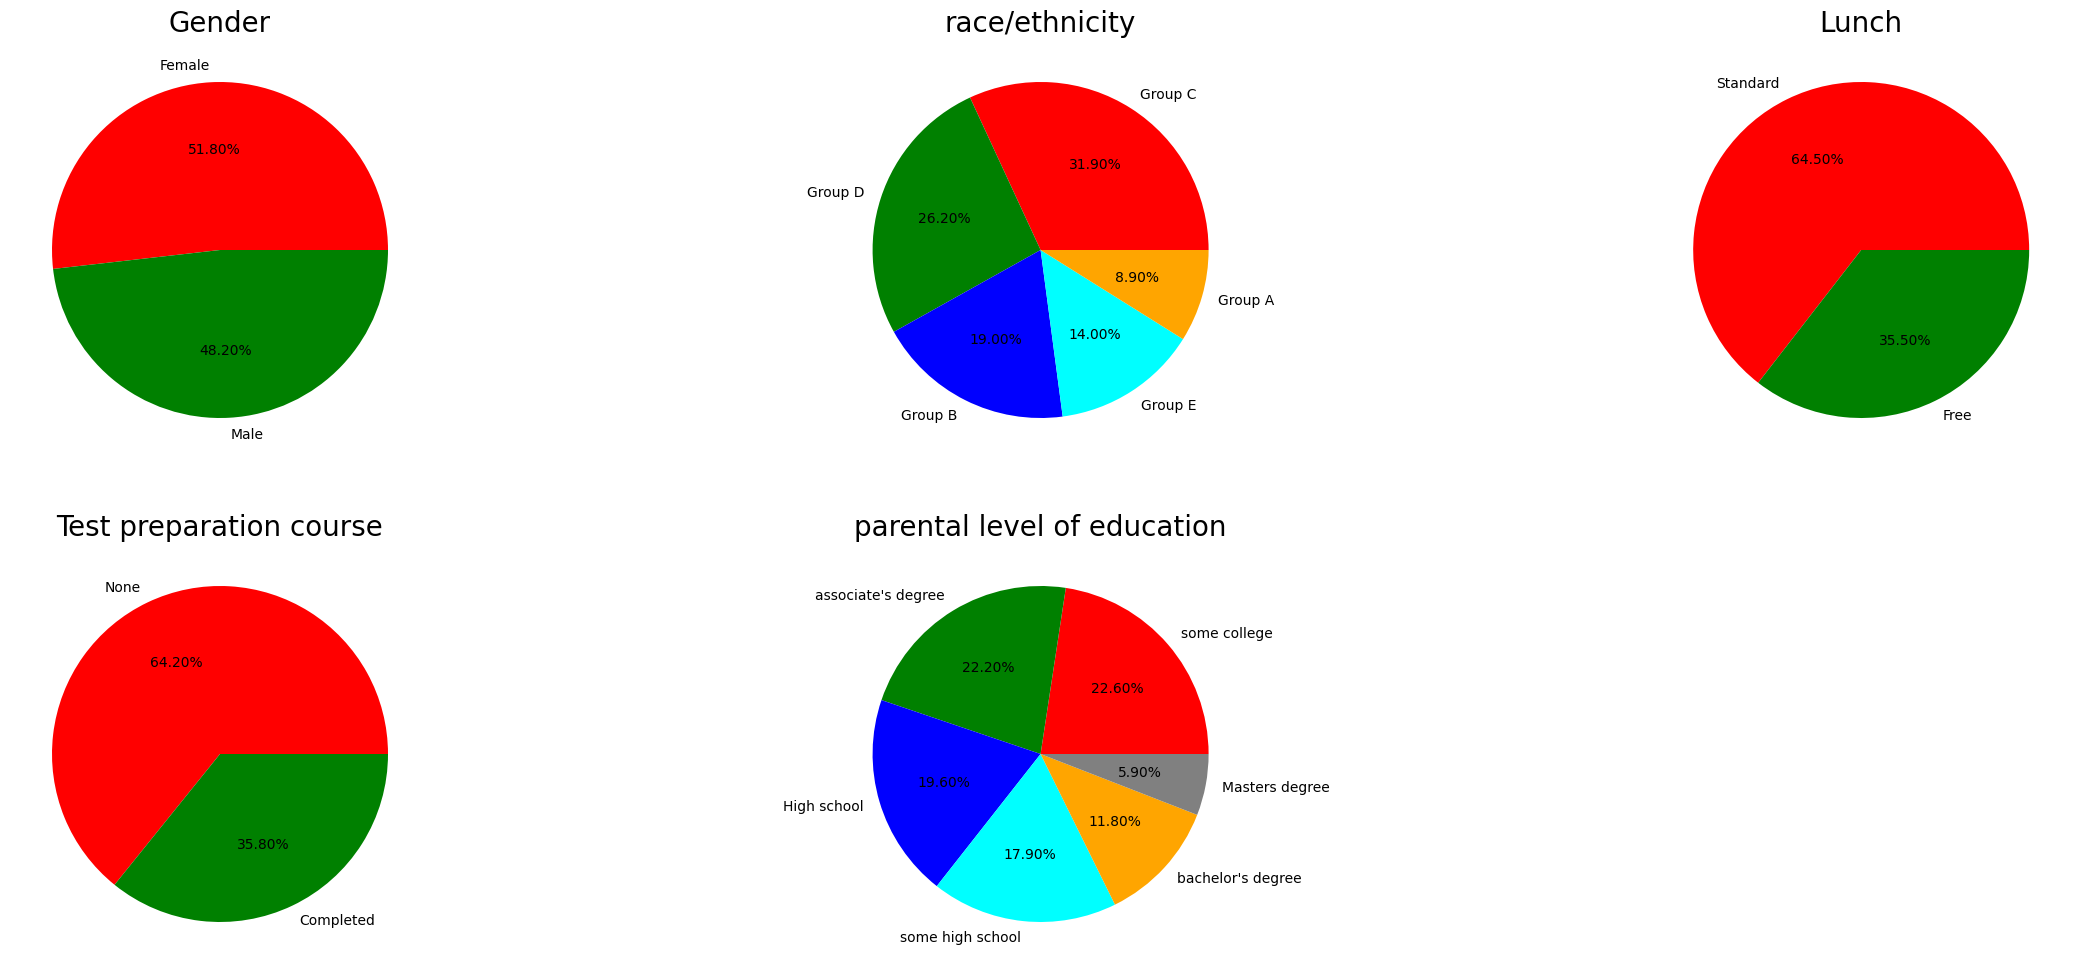

In [27]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(2,3,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['red','green']


plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(2,3,2)
size=df['race/ethnicity'].value_counts()
labels='Group C','Group D','Group B','Group E','Group A'
color=['red','green','blue','cyan','orange']


plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('race/ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(2,3,3)
size=df['lunch'].value_counts()
labels='Standard','Free'
color=['red','green']


plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(2,3,4)
size=df['test preparation course'].value_counts()
labels='None','Completed'
color=['red','green']


plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Test preparation course',fontsize=20)
plt.axis('off')

plt.subplot(2,3,5)
size=df['parental level of education'].value_counts()
labels='some college',"associate's degree",'High school','some high school',"bachelor's degree" ,'Masters degree'
color=['red','green','blue','cyan','orange','grey']


plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('parental level of education',fontsize=20)
plt.axis('off')


No of male and female is almost equal

no of stu are greatest in group C

no of stu who have standard lunch are greater

no of stu not enrolled in any test is greater

no of stu whose parental edu is 'some college is greated followed closely by 'associate degree'

## Univariate analysis

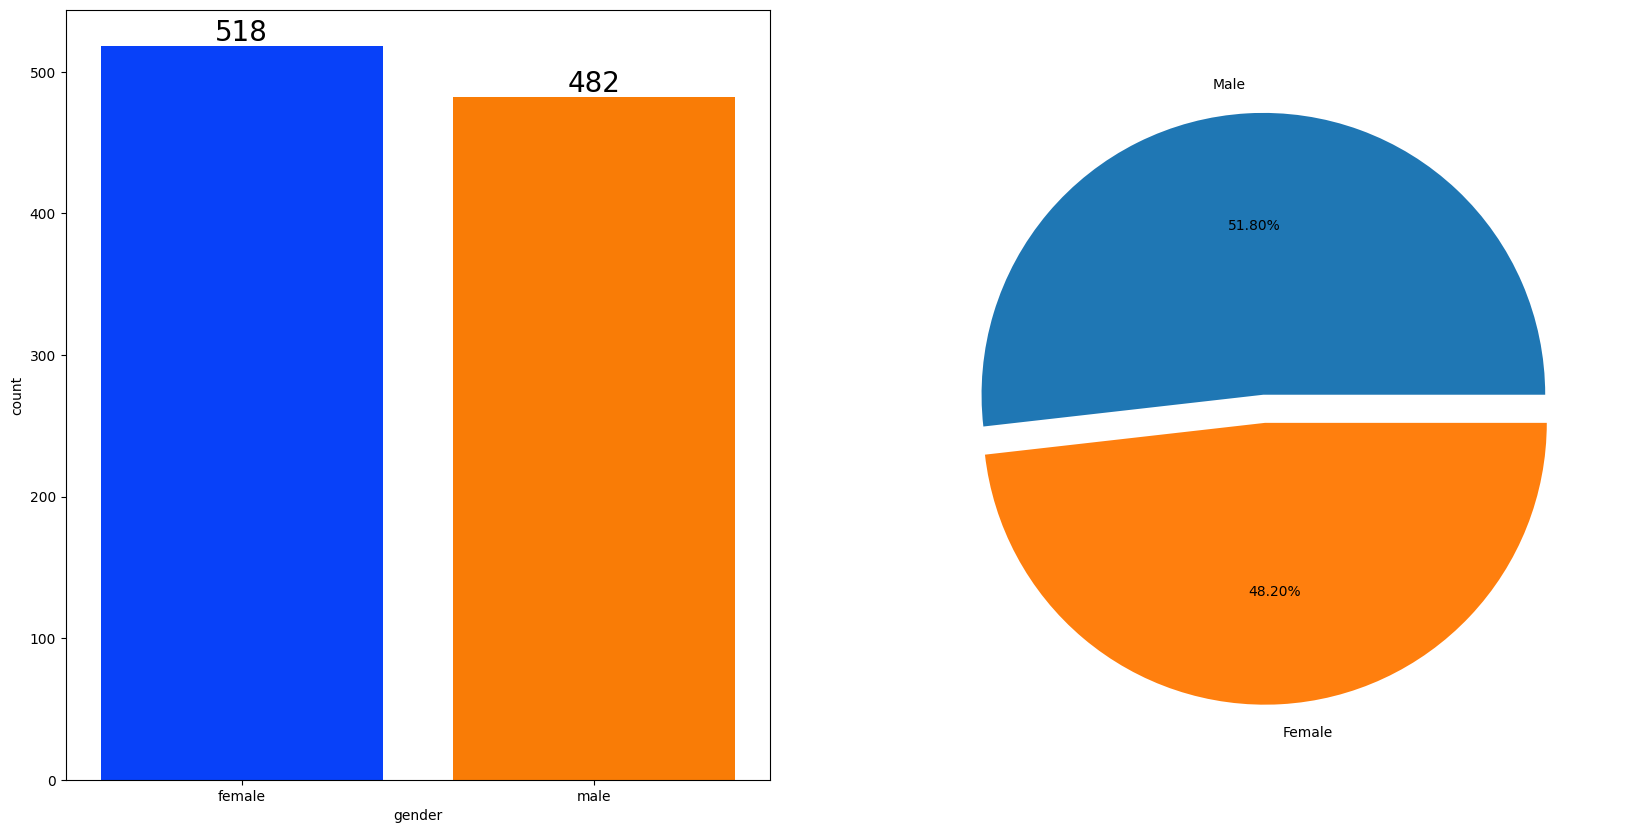

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for con in ax[0].containers:
    ax[0].bar_label(con,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%.2f%%')
plt.show()

In [29]:
gender_group=df.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837303


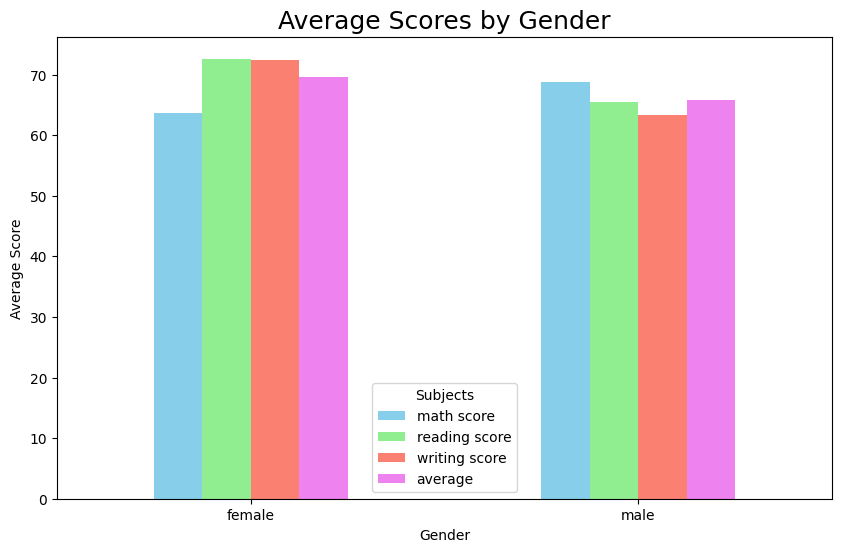

In [30]:
gender_group[['math score','reading score','writing score','average']].plot(
    kind='bar',
    figsize=(10,6),
    color=['skyblue', 'lightgreen', 'salmon', 'violet']
)

plt.title('Average Scores by Gender', fontsize=18)
plt.ylabel('Average Score')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Subjects')
plt.show()


on a average female have a better overall score than men
whereas male have scored higher in maths

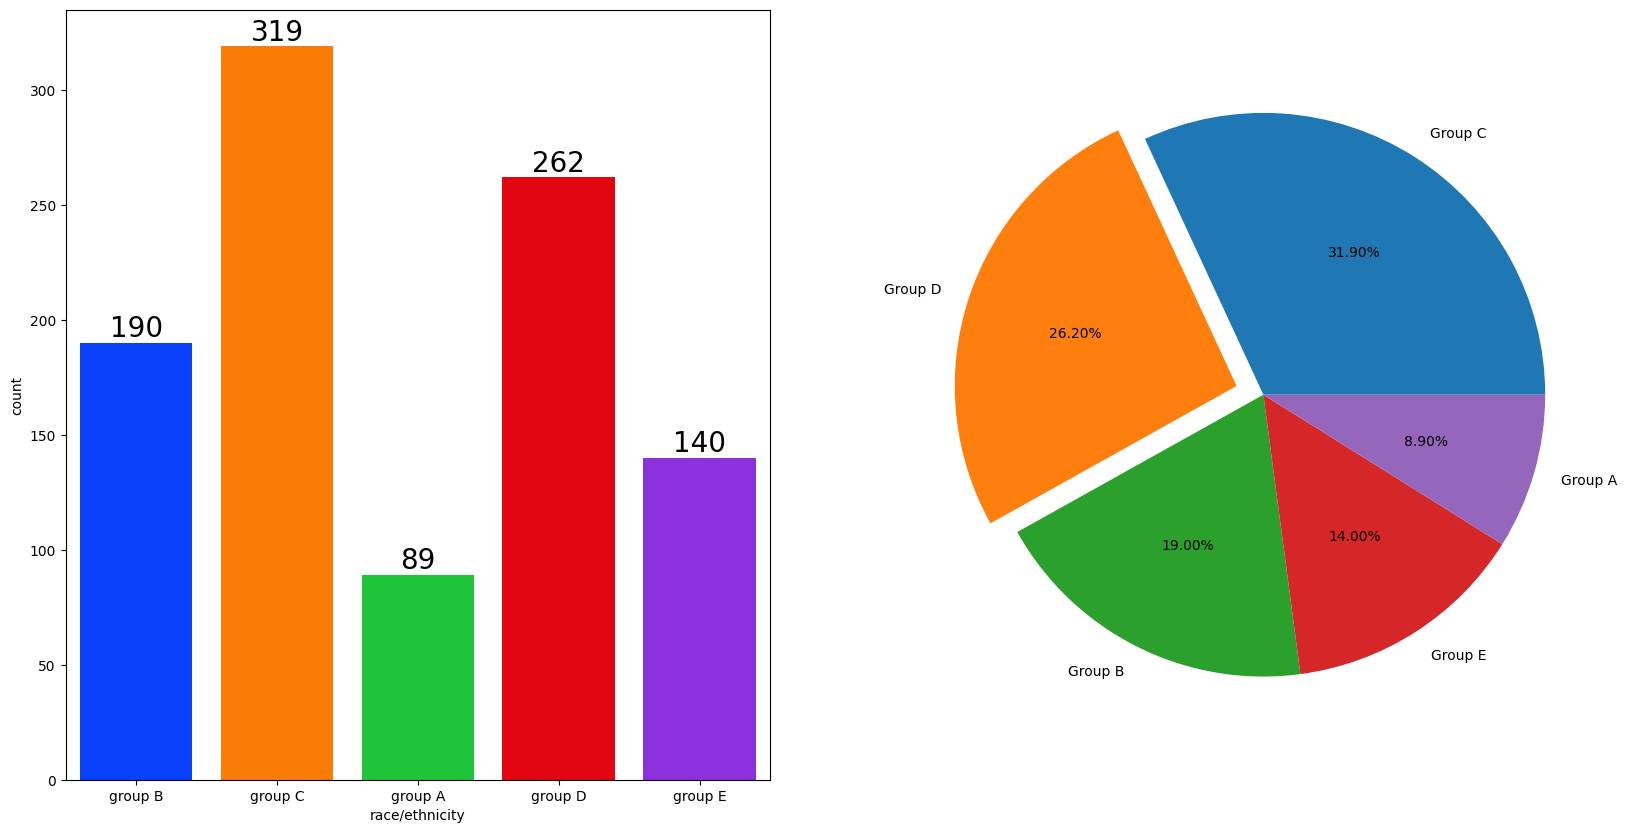

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for con in ax[0].containers:
    ax[0].bar_label(con,color='black',size=20)

plt.pie(x=df['race/ethnicity'].value_counts(),labels=['Group C','Group D','Group B','Group E','Group A'],explode=[0,0.1,0,0,0],autopct='%.2f%%')
plt.show()

In [32]:
race_group=df.groupby('race/ethnicity').mean(numeric_only=True) 
race_group

,math score,reading score,writing score,total score,average
race/ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992135
group B,63.452632,67.352632,65.600000,196.405263,65.468579
group C,64.463950,69.103448,67.827586,201.394984,67.131567
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752000


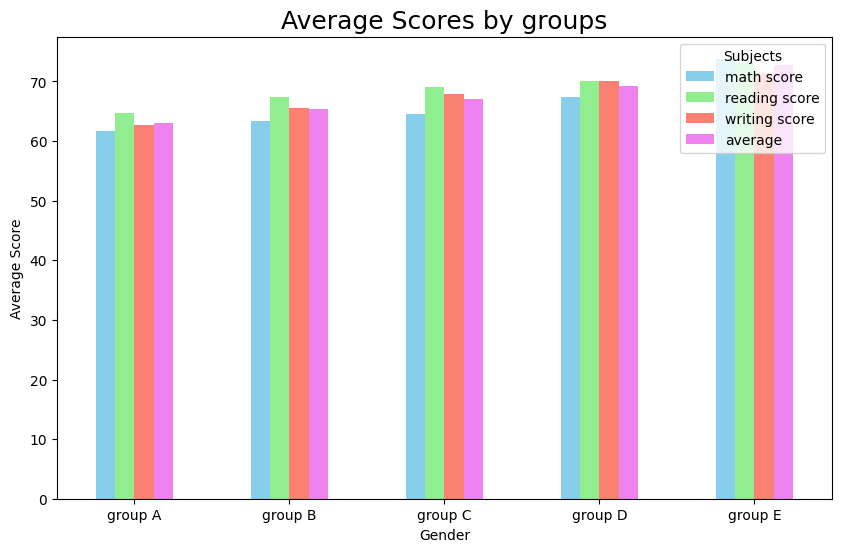

In [34]:

race_group[['math score','reading score','writing score','average']].plot(
    kind='bar',
    figsize=(10,6),
    color=['skyblue', 'lightgreen', 'salmon', 'violet']
)

plt.title('Average Scores by groups', fontsize=18)
plt.ylabel('Average Score')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Subjects')
plt.show()


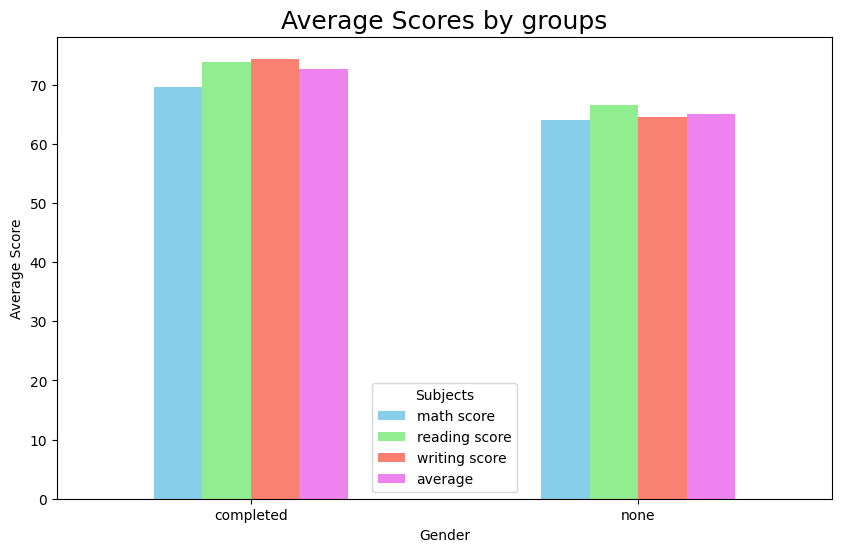

In [35]:
test_group=df.groupby('test preparation course').mean(numeric_only=True) 
test_group[['math score','reading score','writing score','average']].plot(
    kind='bar',
    figsize=(10,6),
    color=['skyblue', 'lightgreen', 'salmon', 'violet']
)

plt.title('Average Scores by groups', fontsize=18)
plt.ylabel('Average Score')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Subjects')
plt.show()

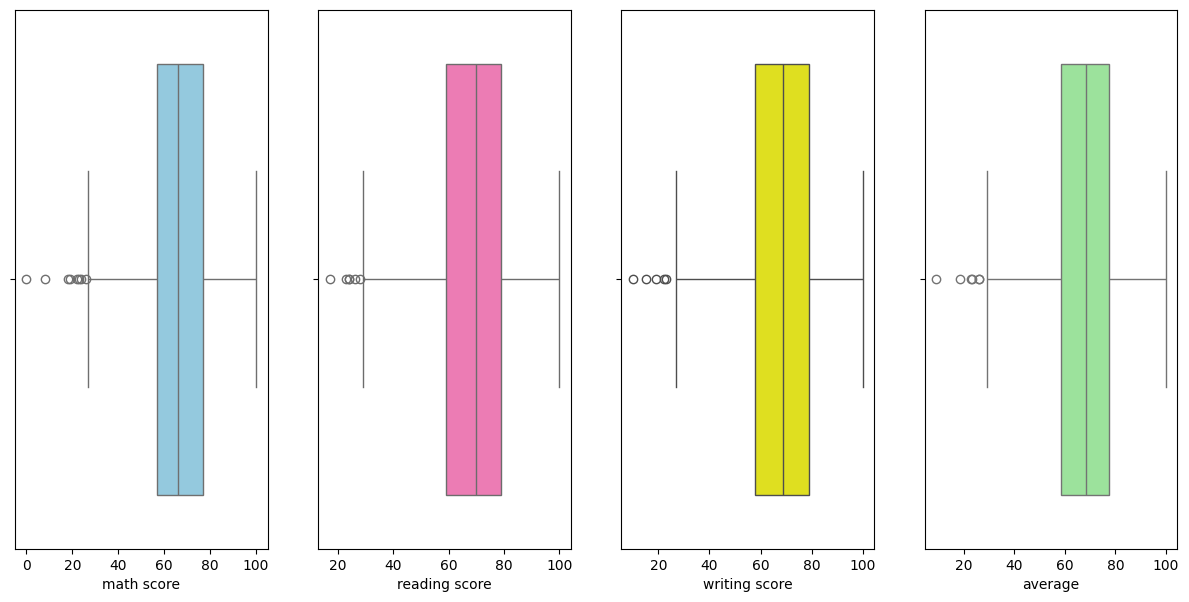

In [37]:
#checking outliers

plt.subplots(1,4,figsize=(15,7))
plt.subplot(141)
sns.boxplot(data=df,x='math score',color='skyblue')
plt.subplot(142)
sns.boxplot(data=df,x='reading score',color='hotpink')
plt.subplot(143)
sns.boxplot(data=df,x='writing score',color='yellow')
plt.subplot(144)
sns.boxplot(data=df,x='average',color='lightgreen')
plt.show()


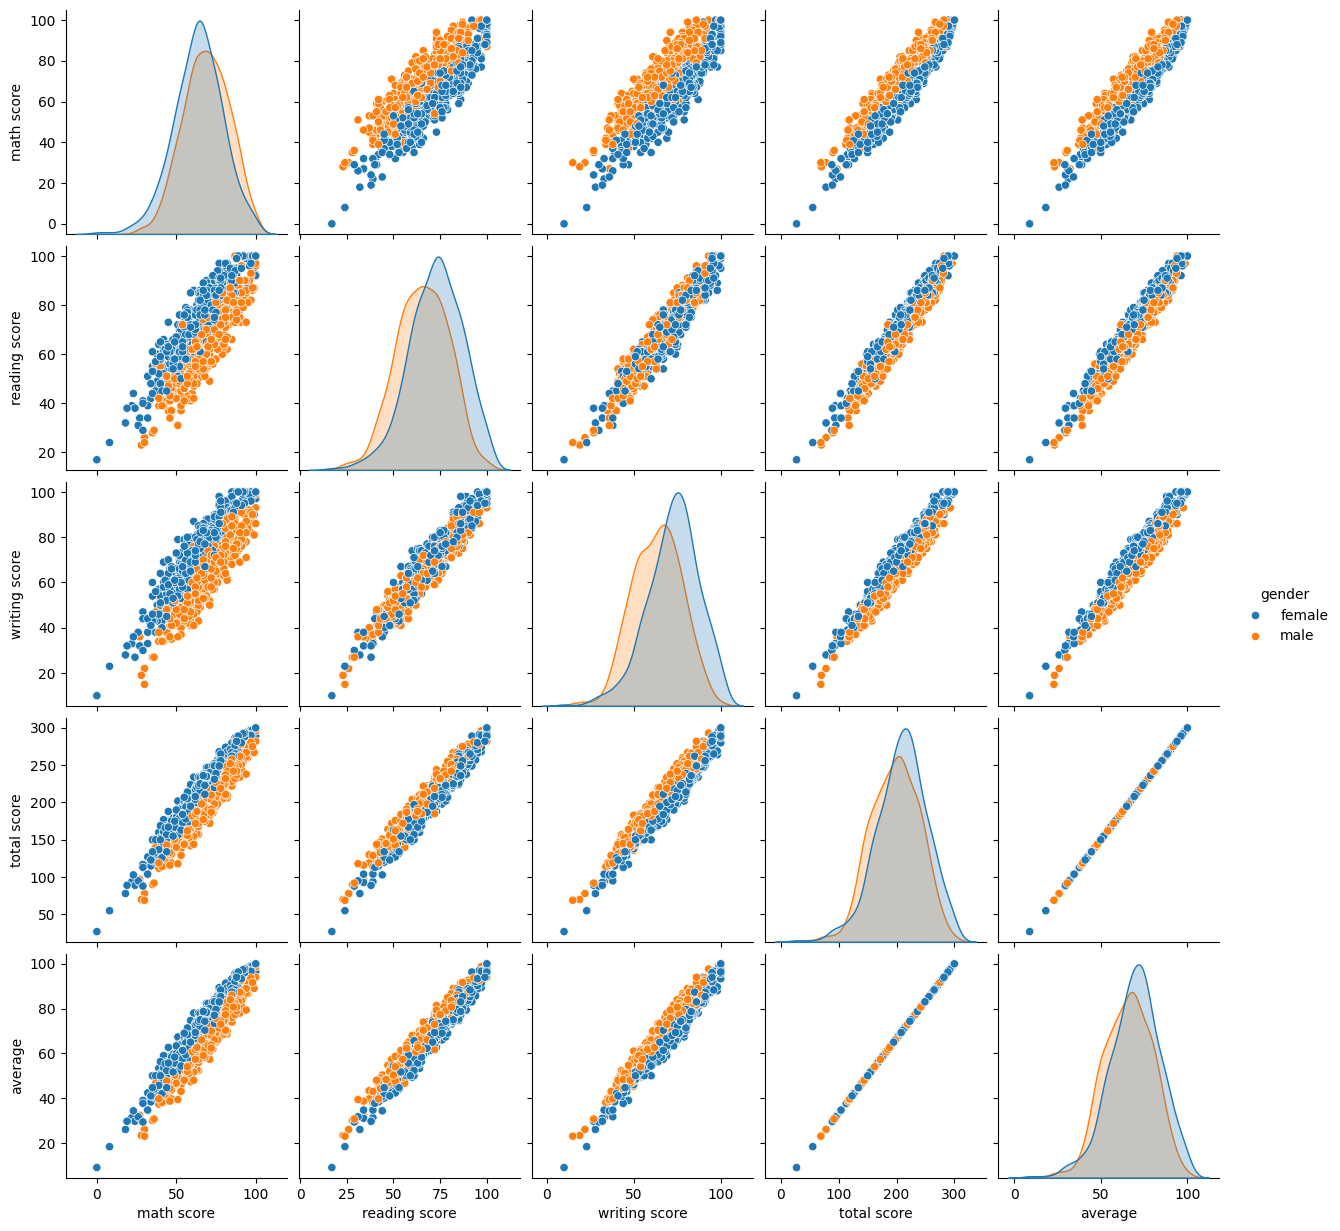

In [38]:
sns.pairplot(df,hue='gender')
plt.show()

from the plot it is clear that all the score increase linearly with each other

In [43]:
corr=df[['math score','reading score','writing score']].corr()
corr

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [46]:
cn=df.groupby('gender')[['math score','reading score','writing score']].mean()
cn

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


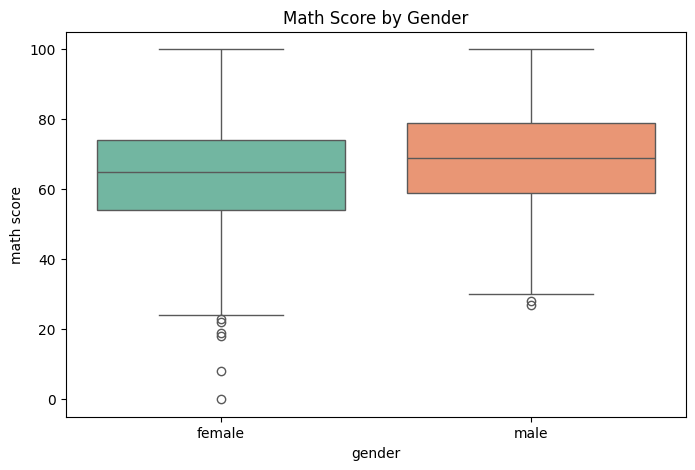

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='gender', y='math score', data=df, palette='Set2')
plt.title('Math Score by Gender')
plt.show()


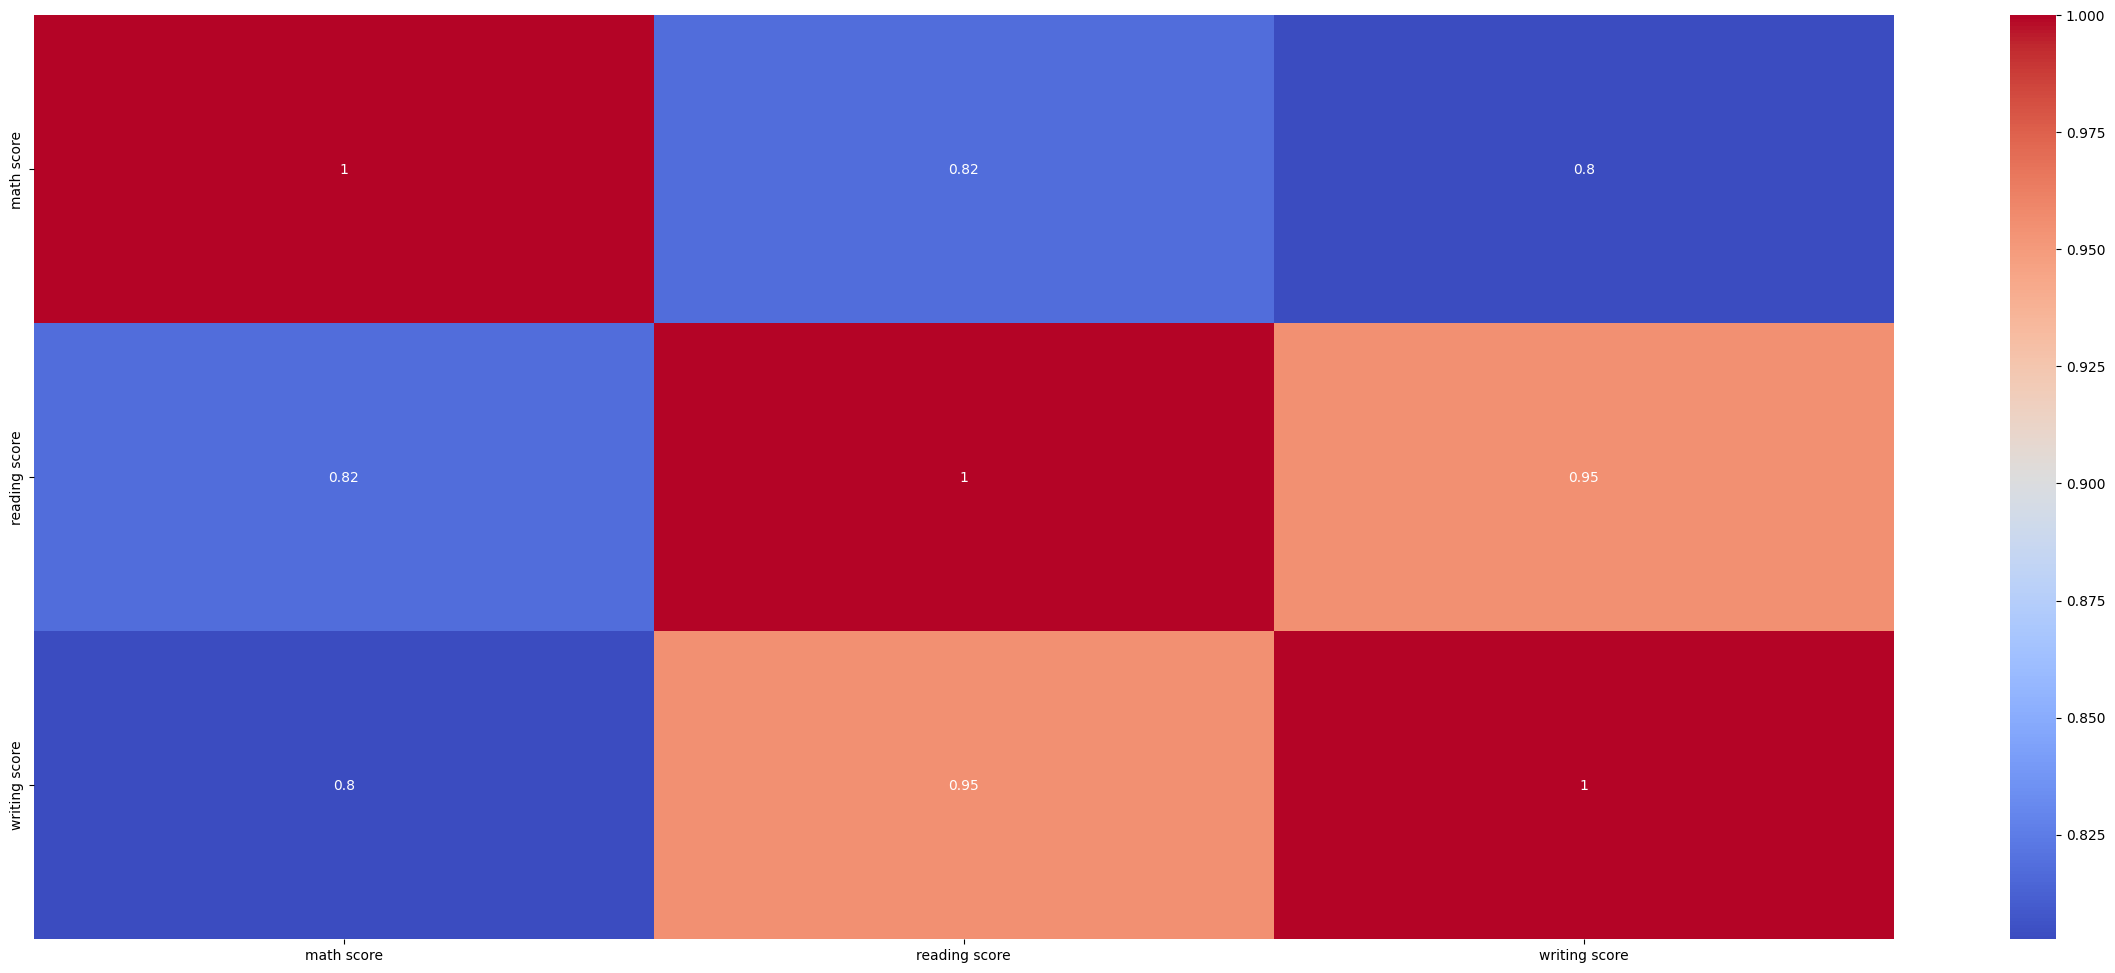

In [44]:
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.show()

## conclusion

1.students performance is related with lunch ,race,parental level education

2.females lead in pass percentage and also top scorers

3.students performance is not much related with test preparations course